In [1]:
import sympy as sp
from sympy.simplify.radsimp import collect_sqrt as sp_simplify_collect_sqrt
import QSymPy as qp

import numpy as np
import tqdm
import matplotlib.pyplot as plt


In [2]:
system_size = 4
b_reg_size = int(np.log2(system_size))
c_reg_size = 5
num_qubits = c_reg_size + b_reg_size + 1
qc = qp.HHL(num_qubits=num_qubits, num_clbits=0)
qc.add_gate(name='H_eI', qubits_t=[num_qubits-2])
qc.add_gate(name='H', qubits_t=[num_qubits-1])
qc.assemble_symbolic_unitary()
#qc.unitary

In [3]:
phi = qp.QuantumState(num_qubits)
#phi.state

In [4]:
phi_prep = qc.unitary @ phi.state
#phi_prep

In [5]:
phi_prep_0 = phi_prep.subs({phi.state[i]: 0 for i in range(1,phi.state.shape[0])}, simultaneous=False)
#phi_prep_0

In [6]:
phi_prep_0.free_symbols

{H_eI_qt6_qc_s0_p00,
 H_eI_qt6_qc_s0_p10,
 H_qt7_qc_s0_p00,
 H_qt7_qc_s0_p10,
 phi0}

In [7]:
p = sp.Symbol('p', real=True, nonnegative=True)
pri_prep_0_h = phi_prep_0.subs({phi.state[0]: 1,
                                f'H_eI_qt{num_qubits-2}_qc_s0_p00': 1/sp.sqrt(2)+(1-1/sp.sqrt(2))*p,
                                f'H_eI_qt{num_qubits-2}_qc_s0_p01': 1/sp.sqrt(2)+(0-1/sp.sqrt(2))*p,
                                f'H_eI_qt{num_qubits-2}_qc_s0_p10': 1/sp.sqrt(2)+(0-1/sp.sqrt(2))*p,
                                f'H_eI_qt{num_qubits-2}_qc_s0_p11':-1/sp.sqrt(2)+(1+1/sp.sqrt(2))*p,
                                f'H_qt{num_qubits-1}_qc_s0_p00': 1/sp.sqrt(2),
                                f'H_qt{num_qubits-1}_qc_s0_p01': 1/sp.sqrt(2),
                                f'H_qt{num_qubits-1}_qc_s0_p10': 1/sp.sqrt(2),
                                f'H_qt{num_qubits-1}_qc_s0_p11':-1/sp.sqrt(2)})
#pri_prep_0_h

In [8]:
hhl_op_wo_meas_wo_prep = np.load(f'QSymPy/HHL_result_Qiskit_{system_size}x{system_size}_c{c_reg_size}.npy')
hhl_op_wo_meas_wo_prep

array([[ 0.53405455+3.82430632e-15j, -0.2634773 -1.46844342e-15j,
         0.00367923+1.97813268e-03j, ..., -0.00742691-6.43206236e-03j,
        -0.01432298-8.59061783e-03j,  0.02373196-8.61287566e-03j],
       [ 0.2634773 +1.46844342e-15j,  0.53405455+3.82430632e-15j,
         0.00367923+4.93534356e-03j, ..., -0.00535302-1.01443050e-02j,
        -0.02373196+8.61287566e-03j, -0.01432298-8.59061783e-03j],
       [ 0.00367923-1.97813268e-03j, -0.00367923+4.93534356e-03j,
        -0.36511277-2.57779909e-15j, ...,  0.0162778 +9.90531065e-03j,
         0.02543638+1.57642993e-02j,  0.00451431+9.89711088e-03j],
       ...,
       [ 0.00742691-6.43206236e-03j, -0.00535302+1.01443050e-02j,
        -0.0162778 +9.90531065e-03j, ...,  0.26067461+1.44936146e-15j,
         0.00251145+9.96278367e-02j,  0.00624436-2.41298310e-02j],
       [-0.01432298+8.59061783e-03j,  0.02373196+8.61287566e-03j,
         0.02543638-1.57642993e-02j, ..., -0.00251145+9.96278367e-02j,
         0.04219528+1.17267307e-15j

In [9]:
hhl_sol = hhl_op_wo_meas_wo_prep @ pri_prep_0_h
#hhl_sol = hhl_sol.subs({'I':1j})
bitstring_le = [format(i, '0' + str(num_qubits) + 'b') for i in range(2**num_qubits)]
state_dict = {key:val for key, val in zip(bitstring_le, hhl_sol)}
#print('state_dict:', state_dict)

y = np.zeros(system_size)
y = sp.tensor.array.MutableDenseNDimArray(y)
for key in tqdm.tqdm(state_dict):
    if key[-1] == '1':
        pos = int(key[0:b_reg_size],2)
        #print(state_dict[key])
        s = state_dict[key]
        sc = sp.conjugate(s)
        ss = sc*s
        #sq = sp.Abs(s)
        sq = sp.sqrt(sp.re(s)**2 + sp.im(s)**2)
        #print(sq)
        y[pos] += sq
        #print('key:', key)
        #print('pos:', pos)
#y = sp.simplify(y)
print('Quantum solution, ratio elem 0/1:', y, y[0]/y[1])

100%|██████████| 256/256 [00:01<00:00, 190.90it/s]


Quantum solution, ratio elem 0/1: [sqrt((-0.148826233740277*sqrt(2)*(-sqrt(2)*p/2 + sqrt(2)/2) + 0.148826233740277*sqrt(2)*(p*(1 - sqrt(2)/2) + sqrt(2)/2))**2 + (-0.0323695439329376*sqrt(2)*(-sqrt(2)*p/2 + sqrt(2)/2) + 0.0350990223738123*sqrt(2)*(p*(1 - sqrt(2)/2) + sqrt(2)/2))**2) + sqrt((-0.0932694494606943*sqrt(2)*(-sqrt(2)*p/2 + sqrt(2)/2) + 0.0932694494606939*sqrt(2)*(p*(1 - sqrt(2)/2) + sqrt(2)/2))**2 + (-0.0163139831238155*sqrt(2)*(-sqrt(2)*p/2 + sqrt(2)/2) + 0.0260096189547614*sqrt(2)*(p*(1 - sqrt(2)/2) + sqrt(2)/2))**2) + sqrt((-0.0910581708130034*sqrt(2)*(-sqrt(2)*p/2 + sqrt(2)/2) + 0.0910581708130036*sqrt(2)*(p*(1 - sqrt(2)/2) + sqrt(2)/2))**2 + (0.0319562640226176*sqrt(2)*(-sqrt(2)*p/2 + sqrt(2)/2) - 0.020551456428638*sqrt(2)*(p*(1 - sqrt(2)/2) + sqrt(2)/2))**2) + sqrt((-0.0395936048094198*sqrt(2)*(-sqrt(2)*p/2 + sqrt(2)/2) + 0.0395936048094198*sqrt(2)*(p*(1 - sqrt(2)/2) + sqrt(2)/2))**2 + (-0.0115782945452306*sqrt(2)*(-sqrt(2)*p/2 + sqrt(2)/2) + 0.00618627801777815*sqrt(2)

In [10]:
sol_ratio = y[0]/y[1]
print('Quantum solution, ratio elem 0/1 simplified computed')
#grad_sol_ratio = sp.diff(sol_ratio, p) # this is bottleneck
grad_sol_ratio = (y[0].diff(p)*y[1] - y[0]*y[1].diff(p))/(y[1]**2)

Quantum solution, ratio elem 0/1 simplified computed


In [11]:
########
# version below - using lambdify instead of for loop - is a lot faster
########
#n = 25
#p_sol_ratio = np.zeros((n,2))
#p_grad_sol_ratio = np.zeros((n,2))
##sol_ratio = y[0]/y[1]
##grad_sol_ratio = sp.diff(sol_ratio, p)
#for i, ps in enumerate(tqdm.tqdm(np.linspace(0.,0.1,n))):
#    p_sol_ratio[i,0] = ps
#    p_sol_ratio[i,1] = sol_ratio.subs({p:ps})
#    p_grad_sol_ratio[i,0] = ps
#    p_grad_sol_ratio[i,1] = grad_sol_ratio.subs({p:ps})

In [12]:
n = 25
p_sol_ratio = np.zeros((n,2))
p_grad_sol_ratio = np.zeros((n,2))
#sol_ratio = y[0]/y[1]
#grad_sol_ratio = sp.diff(sol_ratio, p)
f_sol_ratio = sp.lambdify(p, sol_ratio, "numpy")
f_grad_sol_ratio = sp.lambdify(p, grad_sol_ratio, "numpy")
x = np.linspace(0.,0.1,n)
p_sol_ratio[:,0] = x
p_sol_ratio[:,1] = f_sol_ratio(x)
p_grad_sol_ratio[:,0] = x
p_grad_sol_ratio[:,1] = f_grad_sol_ratio(x)

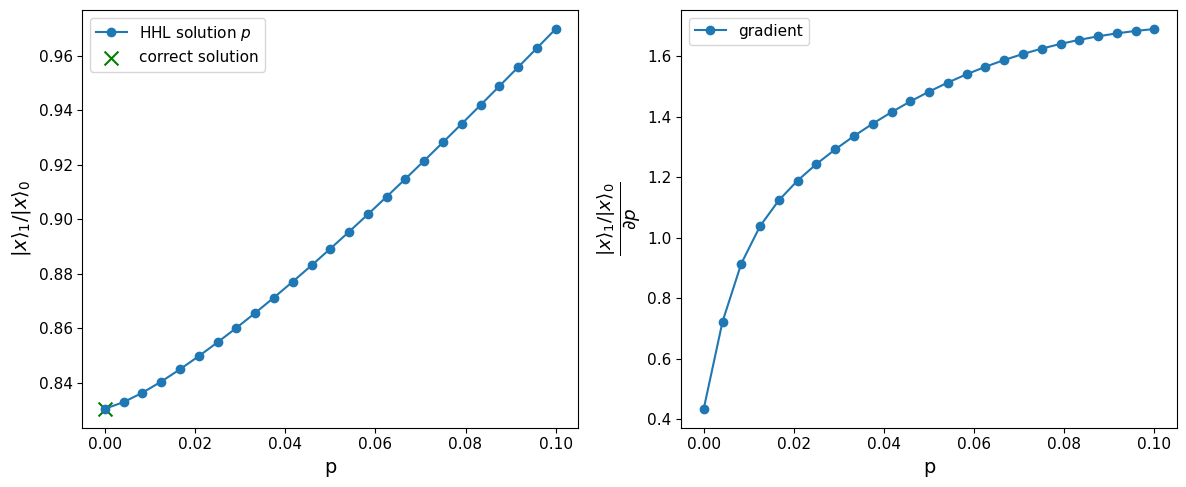

In [13]:
SMALL_SIZE = 11
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig, ax = plt.subplots(1,2, figsize=(12, 5))

#fig.suptitle('Analysis of HHL algorithm output given probability of failure in state preparation of state $|b \\rangle $')

ax[0].plot(p_sol_ratio[:,0], p_sol_ratio[:,1], marker= 'o',
                label='HHL solution $p$')
ax[0].set_xlabel('p')
#ax[0].set_ylabel('$\\frac{|x \\rangle _1}{|x \\rangle _0}$')
ax[0].set_ylabel('$|x \\rangle _1 / |x \\rangle _0$')
ax[0].scatter(p_sol_ratio[0,0], p_sol_ratio[0,1], marker='x', c='green', s=100,
                   label='correct solution')
ax[0].legend()


ax[1].plot(p_grad_sol_ratio[:,0], p_grad_sol_ratio[:,1], marker= 'o', label='gradient')
ax[1].set_xlabel('p')
ax[1].set_ylabel('$\\frac{|x \\rangle _1 / |x \\rangle _0}{\\partial p}$', fontsize=19)
ax[1].legend()

fig.tight_layout()

plt.savefig('QSymPy_HHL_p_sol_ratio.png', dpi=600, bbox_inches='tight')